In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, recall_score
from sklearn.model_selection import train_test_split

df = pd.read_csv('/kaggle/input/titanic/train.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
### Data conversion for network perception

# Replacing NaN Age with mean
# Replacing another NaN by ffill

mean_age = df[["Age"]].mean()

df = df.fillna({'Age':mean_age})
df = df.fillna(method = "ffill")

df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          1
Embarked       0
dtype: int64

In [3]:
# Replacing "Embarked" and "Sex" columns with integer  encoding

label_encoder = preprocessing.LabelEncoder()

df['gender_type'] = label_encoder.fit_transform(df["Sex"])
df['embark_type'] = label_encoder.fit_transform(df["Embarked"])

# Delete unsable features

del df['Ticket']
del df['Sex']
del df['Embarked']
del df['Cabin']
del df['Name']
del df['PassengerId']

df.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,gender_type,embark_type
0,0,3,22.0,1,0,7.2500,1,2
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,0,2
3,1,1,35.0,1,0,53.1000,0,2
4,0,3,35.0,0,0,8.0500,1,2
5,0,3,35.0,0,0,8.4583,1,1
6,0,1,54.0,0,0,51.8625,1,2
7,0,3,2.0,3,1,21.0750,1,2
8,1,3,27.0,0,2,11.1333,0,2
9,1,2,14.0,1,0,30.0708,0,0


In [4]:
# Extract Survived feature as target array

y = df['Survived']
del df['Survived']
 

In [5]:
# Convert all to [0 - 1] 

for i in df.columns:
    a = max(df[i])
    b = min(df[i])
    df[i] = (df[i] - b) / a
    
df.head(10)

,Pclass,Age,SibSp,Parch,Fare,gender_type,embark_type
0,0.666667,0.26975,0.125,0.000000,0.014151,1.0,1.0
1,0.000000,0.46975,0.125,0.000000,0.139136,0.0,0.0
2,0.666667,0.31975,0.000,0.000000,0.015469,0.0,1.0
3,0.000000,0.43225,0.125,0.000000,0.103644,0.0,1.0
4,0.666667,0.43225,0.000,0.000000,0.015713,1.0,1.0
5,0.666667,0.43225,0.000,0.000000,0.016510,1.0,0.5
6,0.000000,0.66975,0.000,0.000000,0.101229,1.0,1.0
7,0.666667,0.01975,0.375,0.166667,0.041136,1.0,1.0
8,0.666667,0.33225,0.000,0.333333,0.021731,0.0,1.0
9,0.333333,0.16975,0.125,0.000000,0.058694,0.0,0.0


In [6]:
# Train/test splitting

x_train, x_test, y_train, y_test = train_test_split(
    df, y, test_size = 0.2, random_state = 13)

# Build network model

model = keras.Sequential([
    layers.Dense(256, activation="relu"),
    layers.Dropout(.75),
    layers.Dense(128, activation="relu"),
    layers.Dropout(.1),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="Adam",
             loss="binary_crossentropy",
             metrics=["accuracy"])

In [7]:
# Fit it!

history = model.fit(x_train,
                    y_train,
                    epochs = 60,
                    batch_size = 32,
                    validation_data = (x_test, y_test))

history_dict = history.history
history_dict.keys()

Epoch 1/60
23/23 [==============================] - 2s 14ms/step - loss: 0.6294 - accuracy: 0.6110 - val_loss: 0.5611 - val_accuracy: 0.6425
Epoch 2/60
23/23 [==============================] - 0s 4ms/step - loss: 0.5845 - accuracy: 0.6896 - val_loss: 0.4990 - val_accuracy: 0.7877
Epoch 3/60
23/23 [==============================] - 0s 4ms/step - loss: 0.5467 - accuracy: 0.7458 - val_loss: 0.4577 - val_accuracy: 0.8212
Epoch 4/60
23/23 [==============================] - 0s 4ms/step - loss: 0.5242 - accuracy: 0.7865 - val_loss: 0.4399 - val_accuracy: 0.8212
Epoch 5/60
23/23 [==============================] - 0s 4ms/step - loss: 0.5136 - accuracy: 0.7683 - val_loss: 0.4386 - val_accuracy: 0.8212
Epoch 6/60
23/23 [==============================] - 0s 4ms/step - loss: 0.4963 - accuracy: 0.7851 - val_loss: 0.4203 - val_accuracy: 0.8156
Epoch 7/60
23/23 [==============================] - 0s 5ms/step - loss: 0.4840 - accuracy: 0.7893 - val_loss: 0.4136 - val_accuracy: 0.8156
Epoch 8/60
23/23 [=

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

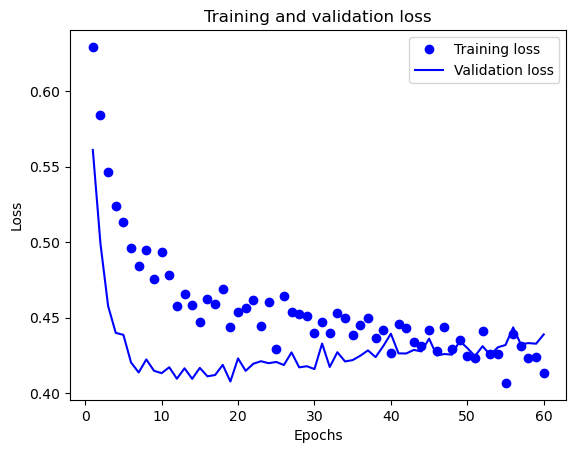

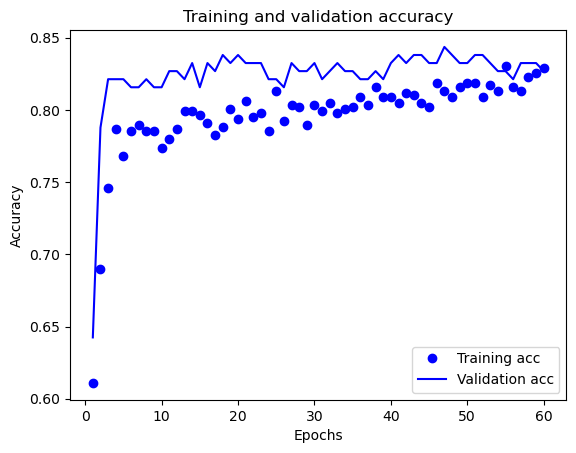

In [8]:
# Visualization of training process, epoch/loss

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Visualization of training process, epoch/accuracy

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



In [9]:
# Prediction and accuracy

pred = model.predict(x_test)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"test_acc: {test_acc}")

6/6 [==============================] - 0s 2ms/step - loss: 0.4389 - accuracy: 0.8268
test_acc: 0.826815664768219


In [10]:
# Optimal metric of success

p = np.around(pred)
recall_score(y_test, p)


0.7246376811594203

In [11]:
# Now. Testing and making prediction & submission

test = pd.read_csv('/kaggle/input/titanic/test.csv')
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
mean_age = test[["Age"]].mean()

test = test.fillna({'Age':mean_age})
test = test.fillna(method = "ffill")

label_encoder = preprocessing.LabelEncoder()

test['gender_type'] = label_encoder.fit_transform(test["Sex"])
test['embark_type'] = label_encoder.fit_transform(test["Embarked"])

del test['Ticket']
del test['Sex']
del test['Embarked']
del test['Cabin']
del test['Name']
del test['PassengerId']

for i in test.columns:
    a = max(test[i])
    b = min(test[i])
    test[i] = (test[i] - b) / a

In [13]:
test.isnull().sum()

Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
gender_type    0
embark_type    0
dtype: int64

In [14]:
sub = np.round(model.predict(test))


14/14 [==============================] - 0s 1ms/step


In [15]:
submission = pd.read_csv('/kaggle/input/titanic/test.csv')

del submission['Ticket']
del submission['Sex']
del submission['Embarked']
del submission['Cabin']
del submission['Name']
del submission['Pclass']
del submission['SibSp']
del submission['Parch']
del submission['Fare']
del submission['Age']
                  
submission.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [16]:
submission["Survived"] = np.round(model.predict(test)).astype(int)
submission.to_csv('/kaggle/working/submission.csv', index=False)


14/14 [==============================] - 0s 1ms/step


In [17]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
